In [1]:
import numpy as np
import pandas as pd
import random
import shap
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
#individuals
n = 50
#loci
m = 100


#here every matrix entree has to be zero or one, with having a f_i probability to get selected
#frequency of alleles, random uniform distribution between 0 and 1, with m samples
f_M = np.random.uniform(0,1,m)

#initialize G matrix
G = np.zeros((n, m));

#will be used to flip a coin based on f_i
#higher f_i frequency = higher chance of returning true
def loci_frequency_flip(f_i):
    return random.random() < f_i

# #here im "fliiping" the coin only for the SNP
# for k in range(0, len(SNP)):
#     if(loci_frequency_flip(f_i)):
#         SNP[k] = 1

#use this if I wanted to populate entire G matrix
#k are the colums(loci)
for k in range (0, len(G[0])):
    # j are the rows(individuals)
    for j in range (0, len(G)):
        #frequency of loci k we are currently on
        if(loci_frequency_flip(f_M[k])):
            G[j,k] = 1

G = preprocessing.scale(G, axis=1)
# choose random SNP
loci =random.randint(0,m-1)

#frequency of that loci from our uniform distribution
f_i = f_M[loci]

#select SNP
SNP = G[:,loci]

print(SNP)

[ 0.92295821  1.06191317  1.02020406  1.06191317  0.94169658  0.96076892
 -1.08347268  1.040833    1.          0.94169658  1.1055416   1.
  0.96076892  0.96076892  0.96076892  1.1751393   0.86855395  0.96076892
  1.1055416   0.88640526  1.08347268  1.          0.94169658  0.96076892
  0.96076892  0.94169658  1.06191317  0.94169658  1.          0.88640526
  0.88640526 -1.12815215  1.02020406  0.90453403  1.          1.040833
  1.1751393   0.94169658  1.02020406  0.94169658  1.08347268  1.040833
  1.02020406  1.02020406  0.94169658  0.98019606  0.94169658  1.
  1.02020406  1.        ]


In [3]:

# mean and standard deviation
H=0
#assumes that we are making a Y_j for every individual in the SNP and 
#in each loop we choose a e_j for that person
def Simulate_Phenotype_PerPerson(SNP,var_e,var_g):
    
    #rows are the loci so each person has a row of different loci
    individuals = len(SNP)
    
    #where columns are the individuals
    mean = 0 
    
    #because we are given variance and python random.normal only accepts std, we need to convert variance to std
    sigma_e = sqrt(var_e)
    sigma_b = sqrt(var_g)
    
    #b_i = loci effect on phenotype
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1));
    
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    return Y_n,H


In [4]:
Y,H = Simulate_Phenotype_PerPerson(SNP,.1,.1)

In [5]:
#third function assumes that for each person j in M we make a phenotype Y_j
print('Phenotypes for loci '+str(loci)+' are '+str(Y))

Phenotypes for loci 47 are [[ 0.2215834 ]
 [ 0.38564193]
 [ 0.64356325]
 [ 1.12336958]
 [ 0.74937334]
 [ 0.50690651]
 [-0.97313247]
 [ 0.24185228]
 [ 0.17794549]
 [ 0.98055038]
 [ 0.73815093]
 [ 0.38729675]
 [ 0.64084614]
 [ 0.26518472]
 [ 0.47294887]
 [ 1.07919767]
 [ 0.2333518 ]
 [ 1.08236893]
 [ 0.27018321]
 [ 0.94386058]
 [ 0.96133244]
 [ 1.01310118]
 [ 0.87793828]
 [ 0.73932665]
 [ 0.4487513 ]
 [ 0.48532871]
 [ 0.76891113]
 [ 0.42721673]
 [ 0.64837934]
 [ 0.7977968 ]
 [ 0.46389014]
 [-0.5905918 ]
 [ 0.58808729]
 [ 0.47817967]
 [ 0.56753303]
 [ 0.57030372]
 [ 0.55026946]
 [ 0.42776368]
 [ 0.21523019]
 [ 0.7300128 ]
 [ 1.65568461]
 [ 0.77117129]
 [ 0.3778478 ]
 [ 1.09403498]
 [ 0.55435209]
 [ 0.70512388]
 [ 0.10831884]
 [ 0.60530755]
 [ 0.99107565]
 [ 0.08720296]]


In [6]:
G = np.append(G, Y, axis=1)

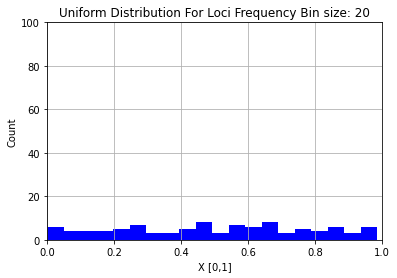

In [7]:
#use this to see distribution of f_i frequency
bin_size = 20
count, bins, ignored = plt.hist(f_M, 20, facecolor='blue') 

plt.xlabel('X [0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution For Loci Frequency Bin size: "+str(bin_size))
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

In [8]:
#starting machine learning classification
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

In [11]:
#split data into test and train
X = G[:,0:len(G[0])-2]
y = G[:,len(G[0])-1]
#split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [12]:
#initialize SVM with RBF kernal
my_SVM = svm.SVC(C=1, kernel='rbf', gamma=0.0005,random_state=1)